# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [11]:
train_dir = r'C:\Users\PMLS\ML\lab12\New folder\train'
validation_dir = r'C:\Users\PMLS\ML\lab12\New folder\validation'
test_dir = r'C:\Users\PMLS\ML\lab12\New folder\test'

In [19]:
from keras import models, layers
from keras.optimizers import Adam

# Build the model
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Block 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))  # Binary classification

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 254, 254, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 125, 125, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 60, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      58,982,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,354,754 (226.42 MB)

 Trainable params: 59,354,370 (226.42 MB)

 Non-trainable params: 384 (1.50 KB)

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']  # use 'accuracy' instead of 'acc' for clarity
)

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 800 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [23]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [ ]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20,
                    callbacks=callbacks)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.5399 - loss: 43.9441  
Epoch 1: val_loss improved from inf to 0.69145, saving model to C:\Users\PMLS\ML\lab12\.ipynb_checkpoints\E1-cp-0001-loss0.69.h5


In [10]:
model_history.history

{'loss': [0.9118812084197998,
  0.512194812297821,
  0.43555203080177307,
  0.3810323476791382,
  0.33200255036354065,
  0.3174760639667511,
  0.2789996862411499,
  0.25931212306022644,
  0.24236275255680084,
  0.20219598710536957,
  0.21021825075149536,
  0.17184142768383026,
  0.16012126207351685,
  0.13878165185451508,
  0.14520876109600067,
  0.11184189468622208,
  0.10543666034936905,
  0.10037023574113846,
  0.0710180252790451,
  0.07944457232952118,
  0.06226333975791931,
  0.05541699752211571,
  0.041760705411434174,
  0.06062600016593933,
  0.03557387366890907,
  0.02798372320830822,
  0.030273614451289177,
  0.0356283038854599,
  0.009177005849778652,
  0.02980680949985981,
  0.024059126153588295,
  0.016912491992115974,
  0.046165820211172104,
  0.002367708133533597,
  0.033314839005470276,
  0.02330094389617443,
  0.0010328961070626974,
  0.04653876647353172,
  0.032476164400577545,
  0.0019504581578075886,
  0.012899048626422882,
  0.0014212244423106313,
  0.00922341365367

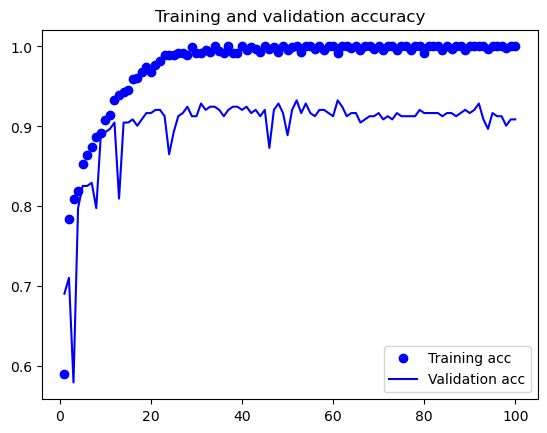

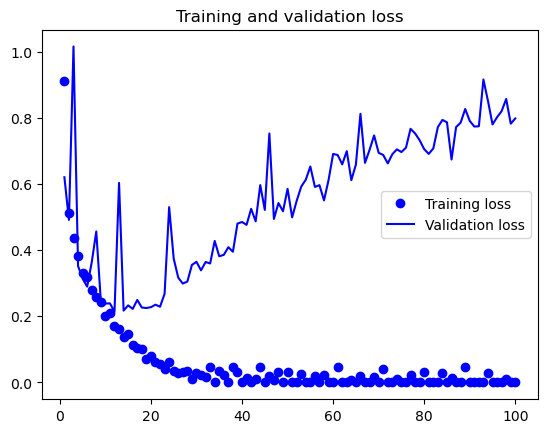

<Figure size 640x480 with 0 Axes>

In [11]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_Accuracy.png')

In [12]:
model.save(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab12\E1-cp-0012-loss0.21.h5')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 2s 242ms/step


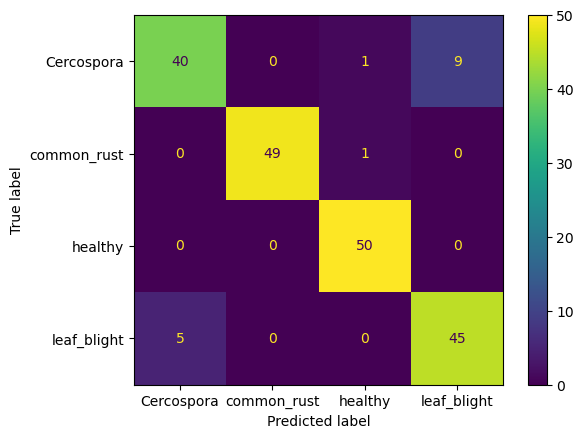

In [14]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [15]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.89      0.80      0.84        50
 common_rust       1.00      0.98      0.99        50
     healthy       0.96      1.00      0.98        50
 leaf_blight       0.83      0.90      0.87        50

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

